In [46]:
%load_ext autoreload
%autoreload 2

import utils
import numpy as np

%matplotlib inline  



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get the Training and Validations sets separating by inputs (X) and output(y)

### Note: the categorical values were scaled between 0 and 1

In [60]:
X_train, y_train, X_valid, y_valid, X_all, y_all = utils.get_train_and_validation_data()

In [61]:
display(X_train.head(3))
display(y_train.head(3))
display(X_valid.head(3))
display(y_valid.head(3))

,Diagnosis_Delay,Age_Range_at_Onset,Riluzole,Sex_Male,Site_Onset,FVC,BMI,Q1_Speech_slope,Q2_Salivation_slope,Q3_Swallowing_slope,...,Q7_Turning_in_Bed_slope,Q8_Walking_slope,Q9_Climbing_Stairs_slope,Q10_Respiratory_slope,Qty_Regions_Involved,Region_Involved_Bulbar,Region_Involved_Upper_Limb,Region_Involved_Lower_Limb,Region_Involved_Respiratory,Patient_with_Gastrostomy
0,1.0,0.50,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.75,1.0,1.0,1.0,0.0,0.0
1,0.5,0.75,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.75,1.0,1.0,1.0,0.0,0.0
2,1.0,0.25,0.0,1.0,1.0,0.0,0.50,0.5,0.0,0.0,...,0.0,0.0,0.5,0.0,0.75,1.0,1.0,1.0,0.0,0.0


,Survival_Group
0,0.0
1,0.0
2,0.0


,Diagnosis_Delay,Age_Range_at_Onset,Riluzole,Sex_Male,Site_Onset,FVC,BMI,Q1_Speech_slope,Q2_Salivation_slope,Q3_Swallowing_slope,...,Q7_Turning_in_Bed_slope,Q8_Walking_slope,Q9_Climbing_Stairs_slope,Q10_Respiratory_slope,Qty_Regions_Involved,Region_Involved_Bulbar,Region_Involved_Upper_Limb,Region_Involved_Lower_Limb,Region_Involved_Respiratory,Patient_with_Gastrostomy
0,0.0,0.75,1.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.75,0.0,1.0,1.0,1.0,0.0
1,1.0,0.25,0.0,0.0,0.0,0.0,0.50,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.25,1.0,0.0,0.0,0.0,0.0
2,0.5,0.75,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0


,Survival_Group
0,0.0
1,0.0
2,0.0


## Decode the Training and Validations sets, i.e., get the original categorical values

In [62]:
X_train_decoded = utils.get_decoded_data_frame(X_train, scaled=True)
display(X_train_decoded.head(3))

X_valid_decoded = utils.get_decoded_data_frame(X_valid, scaled=True)
display(X_valid_decoded.head(3))

y_train_decoded = utils.get_decoded_data_frame(y_train, scaled=True)
display(y_train_decoded.head(3))

y_valid_decoded = utils.get_decoded_data_frame(y_valid, scaled=True)
display(y_valid_decoded.head(3))

X_all_decoded = utils.get_decoded_data_frame(X_all, scaled=True)
y_all_decoded = utils.get_decoded_data_frame(y_all, scaled=True)



,Diagnosis_Delay,Age_Range_at_Onset,Riluzole,Sex_Male,Site_Onset,FVC,BMI,Q1_Speech_slope,Q2_Salivation_slope,Q3_Swallowing_slope,...,Q7_Turning_in_Bed_slope,Q8_Walking_slope,Q9_Climbing_Stairs_slope,Q10_Respiratory_slope,Qty_Regions_Involved,Region_Involved_Bulbar,Region_Involved_Upper_Limb,Region_Involved_Lower_Limb,Region_Involved_Respiratory,Patient_with_Gastrostomy
0,Long,50-59,No,Yes,Limb/Spinal,Normal,(3) Overweight,Slow,Slow,Slow,...,Slow,Slow,Slow,Slow,3,Yes,Yes,Yes,No,No
1,Average,60-69,No,Yes,Limb/Spinal,Normal,(3) Overweight,Slow,Slow,Slow,...,Slow,Slow,Average,Slow,3,Yes,Yes,Yes,No,No
2,Long,40-49,No,Yes,Limb/Spinal,Normal,(2) Normal weight,Average,Slow,Slow,...,Slow,Slow,Average,Slow,3,Yes,Yes,Yes,No,No


,Diagnosis_Delay,Age_Range_at_Onset,Riluzole,Sex_Male,Site_Onset,FVC,BMI,Q1_Speech_slope,Q2_Salivation_slope,Q3_Swallowing_slope,...,Q7_Turning_in_Bed_slope,Q8_Walking_slope,Q9_Climbing_Stairs_slope,Q10_Respiratory_slope,Qty_Regions_Involved,Region_Involved_Bulbar,Region_Involved_Upper_Limb,Region_Involved_Lower_Limb,Region_Involved_Respiratory,Patient_with_Gastrostomy
0,Short,60-69,Yes,Yes,Limb/Spinal,Normal,(3) Overweight,Slow,Slow,Slow,...,Slow,Slow,Average,Slow,3,No,Yes,Yes,Yes,No
1,Long,40-49,No,No,Bulbar,Normal,(2) Normal weight,Average,Average,Slow,...,Slow,Slow,Slow,Slow,1,Yes,No,No,No,No
2,Average,60-69,No,Yes,Limb/Spinal,Normal,(3) Overweight,Slow,Slow,Slow,...,Slow,Slow,Slow,Slow,4,Yes,Yes,Yes,Yes,No


,Survival_Group
0,Non-Short
1,Non-Short
2,Non-Short


,Survival_Group
0,Non-Short
1,Non-Short
2,Non-Short


## Display the values registered for each input and output variables

In [65]:
print(f'Quantity of Samples: {X_all_decoded.shape[0]}')

print()
print('Input Variables:')
for i, feat in enumerate(X_all_decoded.columns, start=1):
#     print(feat)
    print(f'{i:>2}-{feat:<29}: {np.sort(X_all_decoded[feat].unique())}')
    
print()
print('Output Variable:')
print(f'  -{"Survival_Group":<29}: {np.sort(y_all_decoded["Survival_Group"].unique())}')    

Quantity of Samples: 1967

Input Variables:
 1-Diagnosis_Delay              : ['Average' 'Long' 'Short']
 2-Age_Range_at_Onset           : ['0-39' '40-49' '50-59' '60-69' '70+']
 3-Riluzole                     : ['No' 'Yes']
 4-Sex_Male                     : ['No' 'Yes']
 5-Site_Onset                   : ['Bulbar' 'Limb/Spinal']
 6-FVC                          : ['Abnormal' 'Normal']
 7-BMI                          : ['(0) Severely underweight' '(1) Underweight' '(2) Normal weight'
 '(3) Overweight' '(4) Obesity']
 8-Q1_Speech_slope              : ['Average' 'Rapid' 'Slow']
 9-Q2_Salivation_slope          : ['Average' 'Rapid' 'Slow']
10-Q3_Swallowing_slope          : ['Average' 'Rapid' 'Slow']
11-Q4_Handwriting_slope         : ['Average' 'Rapid' 'Slow']
12-Q5_Cutting_slope             : ['Average' 'Rapid' 'Slow']
13-Q6_Dressing_and_Hygiene_slope: ['Average' 'Rapid' 'Slow']
14-Q7_Turning_in_Bed_slope      : ['Average' 'Rapid' 'Slow']
15-Q8_Walking_slope             : ['Average' 'Rapid' 

## Plot distribution for each input variables

Column: Diagnosis_Delay  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Average    778     39.55%
Long       766     38.94%
Short      423     21.50%


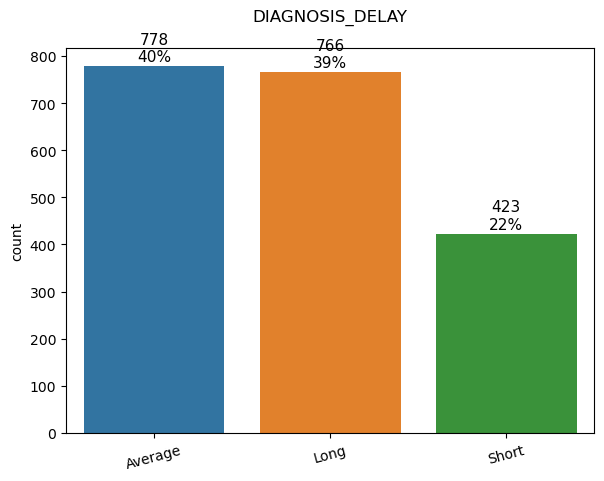

Column: Age_Range_at_Onset  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
       count percentage
50-59    611     31.06%
60-69    507     25.78%
40-49    425     21.61%
0-39     265     13.47%
70+      159      8.08%


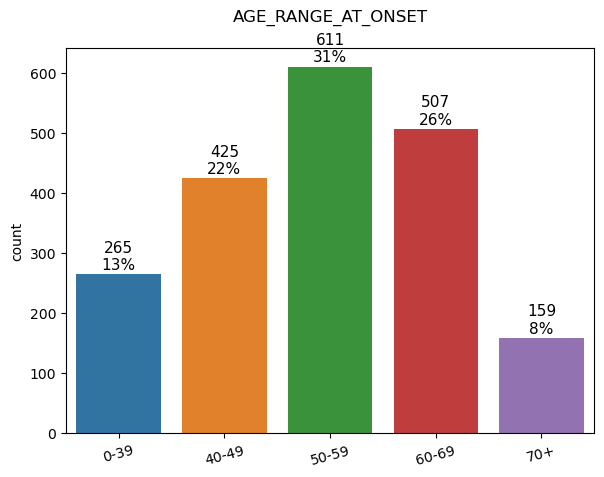

Column: Riluzole  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
     count percentage
No    1355     68.89%
Yes    612     31.11%


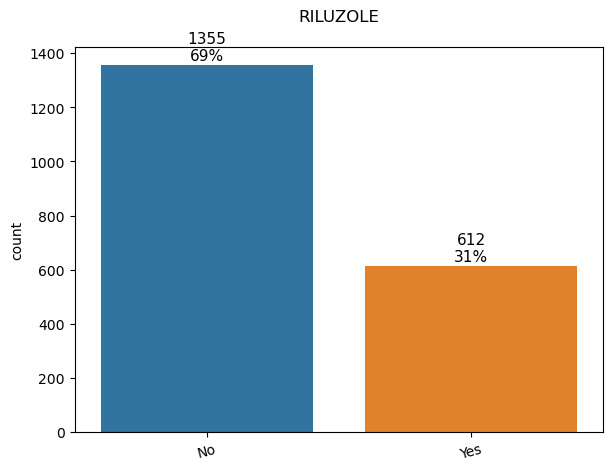

Column: Sex_Male  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
     count percentage
Yes   1209     61.46%
No     758     38.54%


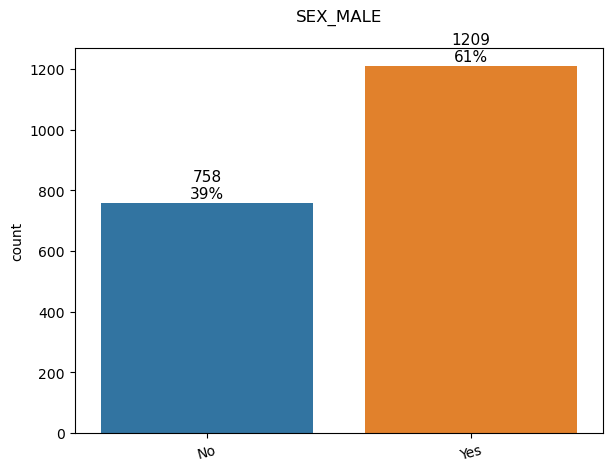

Column: Site_Onset  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
             count percentage
Limb/Spinal   1600     81.34%
Bulbar         367     18.66%


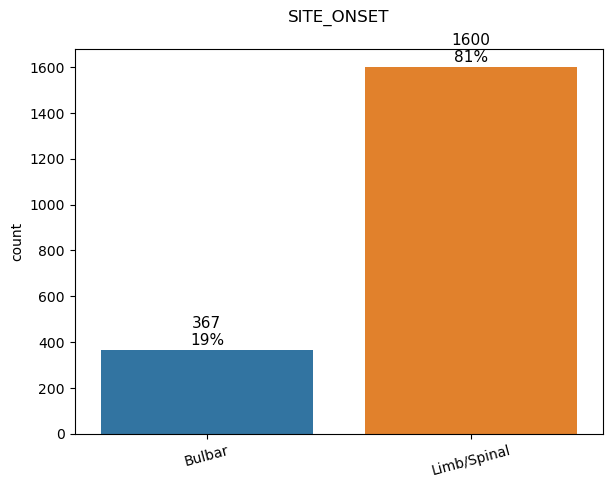

Column: FVC  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
          count percentage
Normal     1547     78.65%
Abnormal    420     21.35%


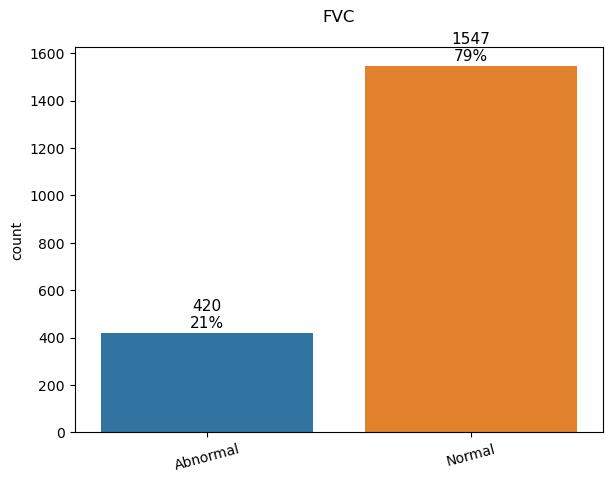

Column: BMI  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
                          count percentage
(2) Normal weight           731     37.16%
(3) Overweight              728     37.01%
(4) Obesity                 456     23.18%
(1) Underweight              41      2.08%
(0) Severely underweight     11      0.56%


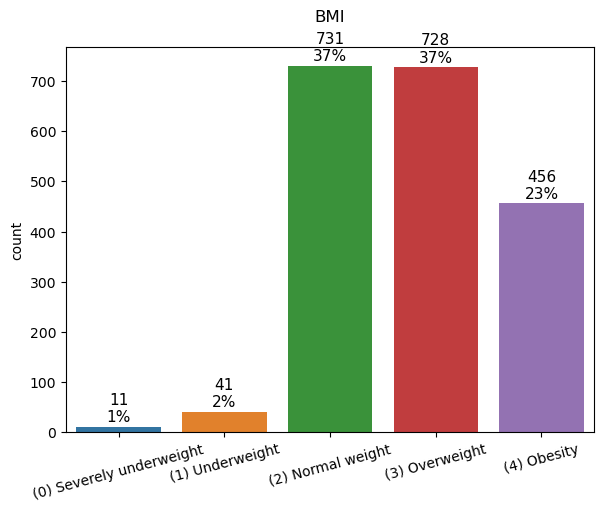

Column: Q1_Speech_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1557     79.16%
Average    357     18.15%
Rapid       53      2.69%


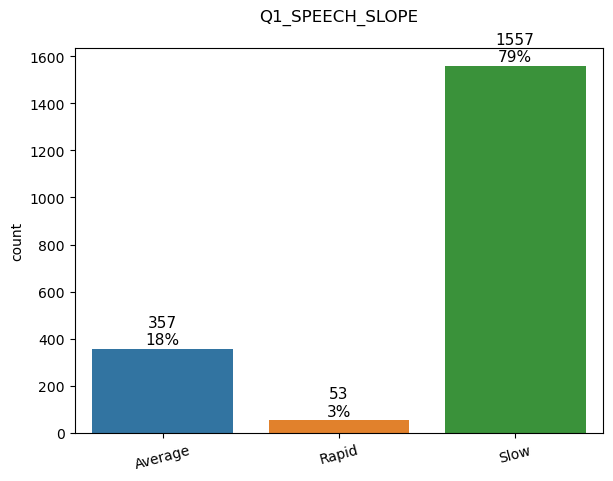

Column: Q2_Salivation_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1690     85.92%
Average    243     12.35%
Rapid       34      1.73%


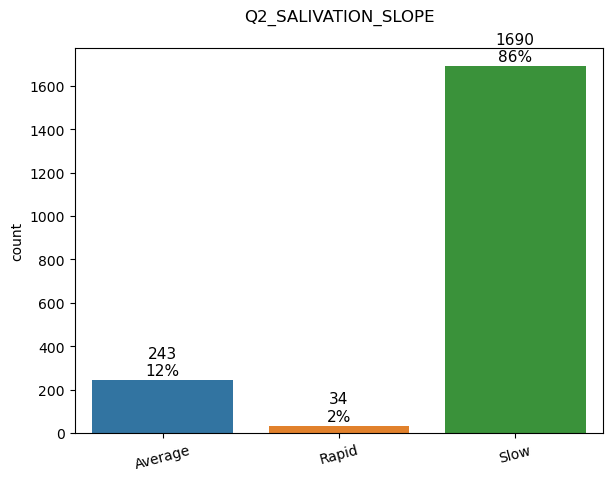

Column: Q3_Swallowing_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1697     86.27%
Average    248     12.61%
Rapid       22      1.12%


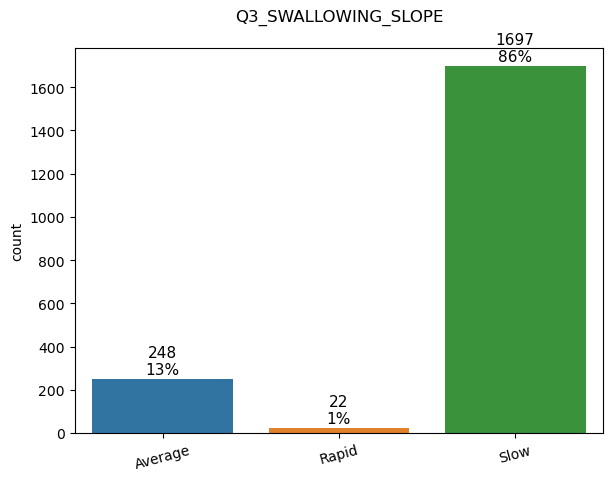

Column: Q4_Handwriting_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1568     79.72%
Average    345     17.54%
Rapid       54      2.75%


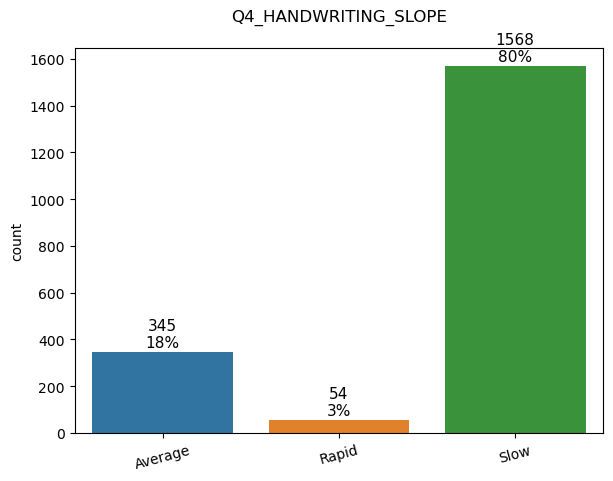

Column: Q5_Cutting_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1404     71.38%
Average    478     24.30%
Rapid       85      4.32%


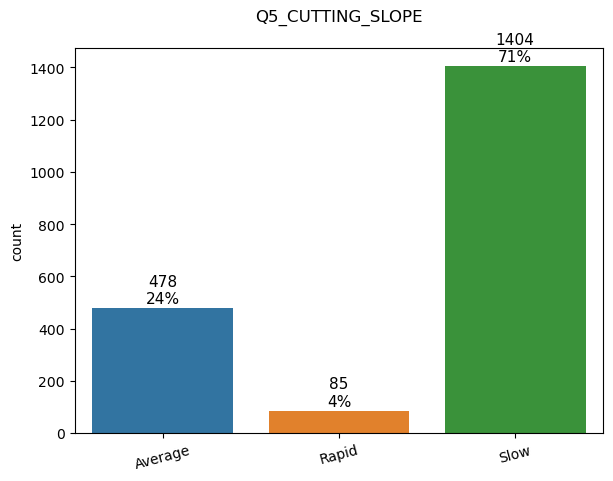

Column: Q6_Dressing_and_Hygiene_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1286     65.38%
Average    584     29.69%
Rapid       97      4.93%


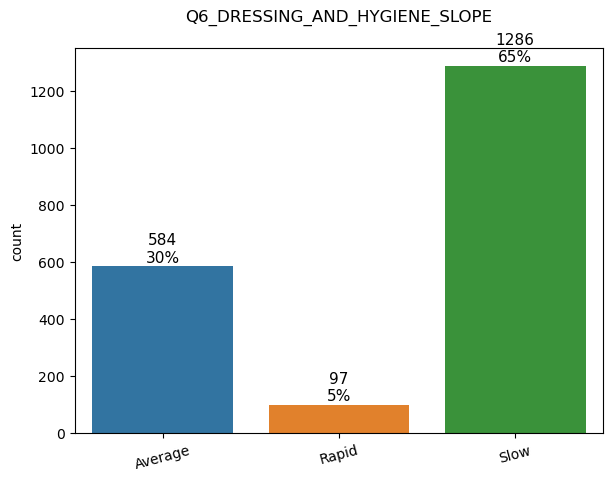

Column: Q7_Turning_in_Bed_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1570     79.82%
Average    354     18.00%
Rapid       43      2.19%


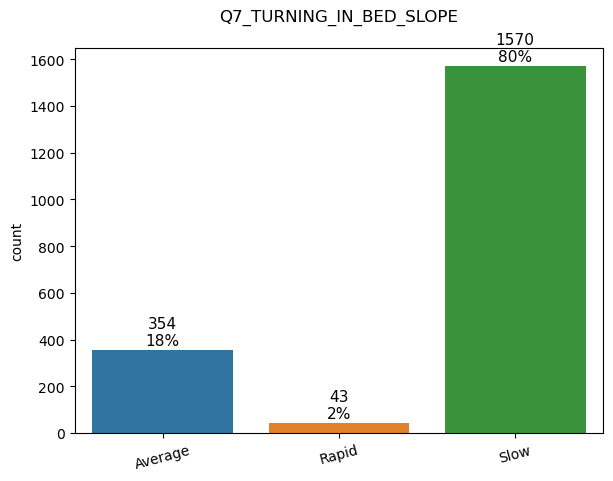

Column: Q8_Walking_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1329     67.56%
Average    570     28.98%
Rapid       68      3.46%


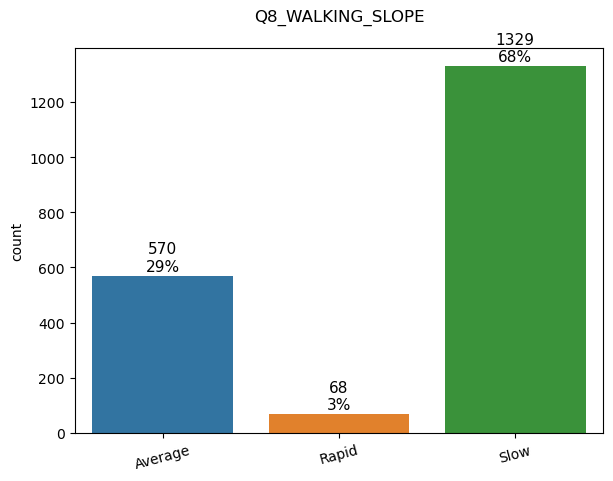

Column: Q9_Climbing_Stairs_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1011     51.40%
Average    734     37.32%
Rapid      222     11.29%


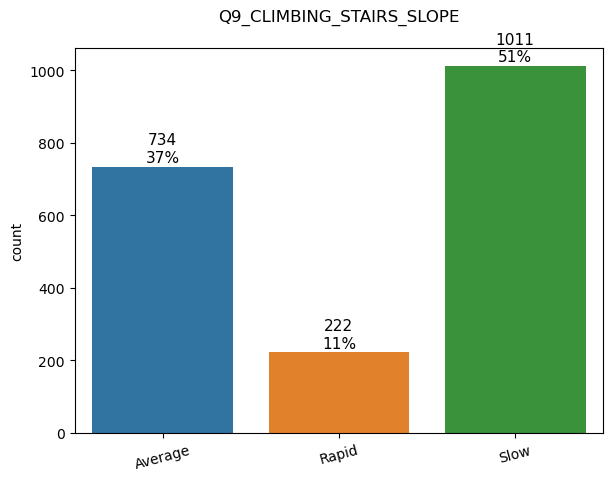

Column: Q10_Respiratory_slope  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
         count percentage
Slow      1784     90.70%
Average    161      8.19%
Rapid       22      1.12%


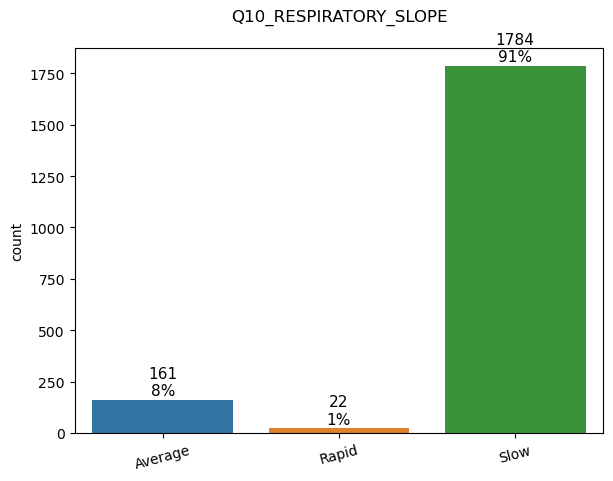

Column: Qty_Regions_Involved  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
   count percentage
3    665     33.81%
2    544     27.66%
4    498     25.32%
1    260     13.22%


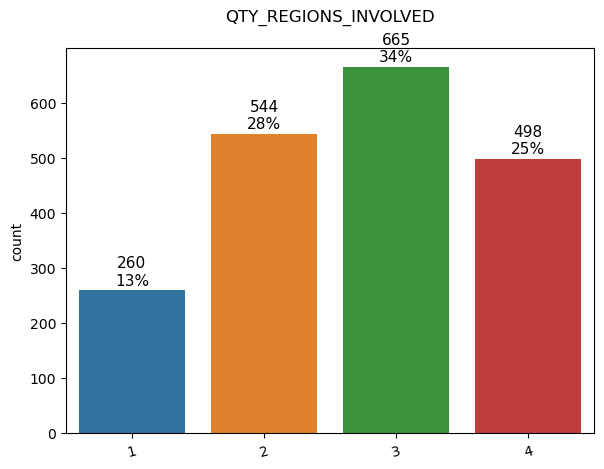

Column: Region_Involved_Bulbar  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
     count percentage
Yes   1274     64.77%
No     693     35.23%


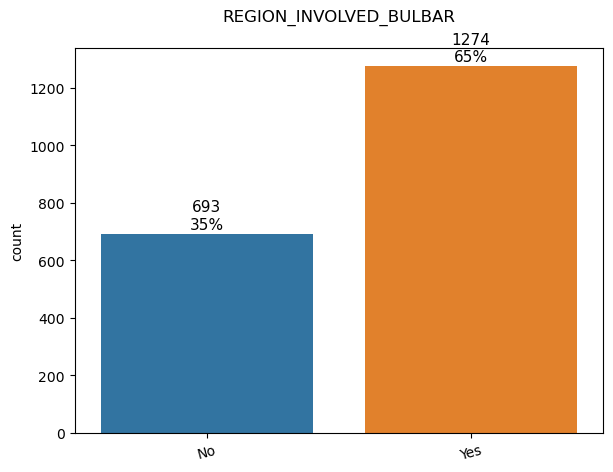

Column: Region_Involved_Upper_Limb  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
     count percentage
Yes   1597     81.19%
No     370     18.81%


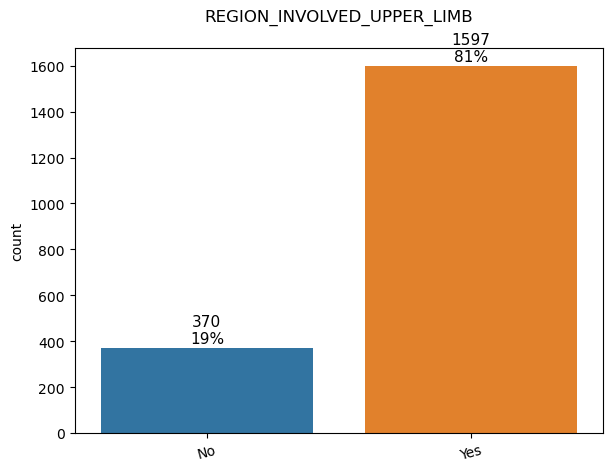

Column: Region_Involved_Lower_Limb  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
     count percentage
Yes   1718     87.34%
No     249     12.66%


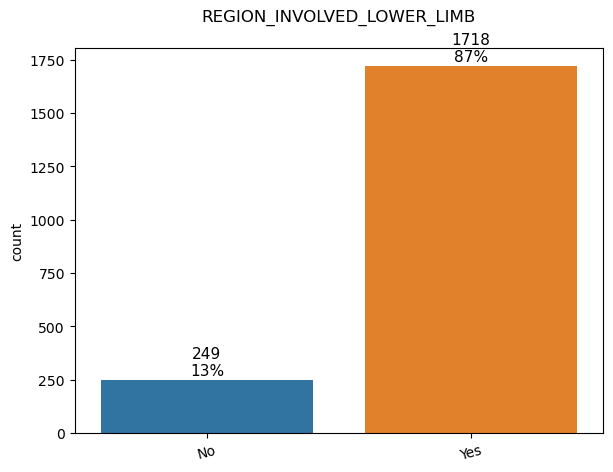

Column: Region_Involved_Respiratory  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
     count percentage
No    1221     62.07%
Yes    746     37.93%


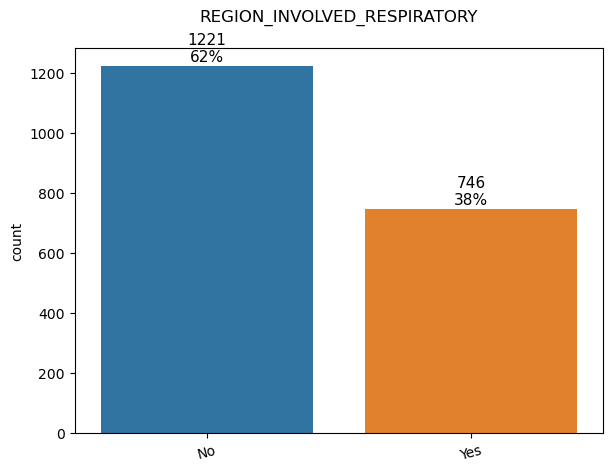

Column: Patient_with_Gastrostomy  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
     count percentage
No    1895     96.34%
Yes     72      3.66%


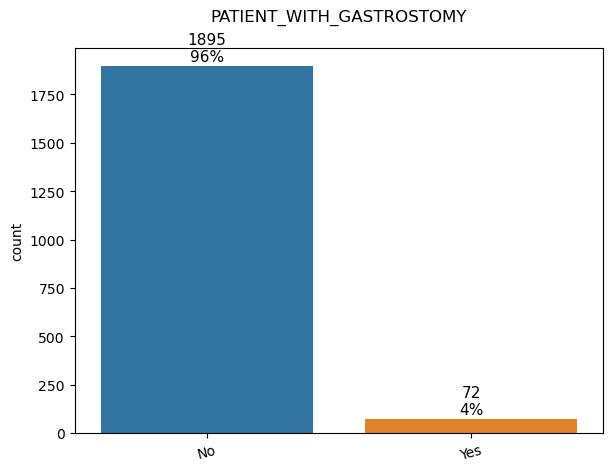

In [83]:
utils.plot_variables_distributions(
    df=X_all_decoded, 
    plot_pareto_graph=False,
    plot_percentage_lines=False,
)

## Plot distribution for the output variable

### Note a data imbalance of 13% / 87%

Column: Survival_Group  (DataType: object)
N         = 1967 [Non-NaN: 1967]
Missingness: 0 (0.0%)

Summary Table:
           count percentage
Non-Short   1717     87.29%
Short        250     12.71%


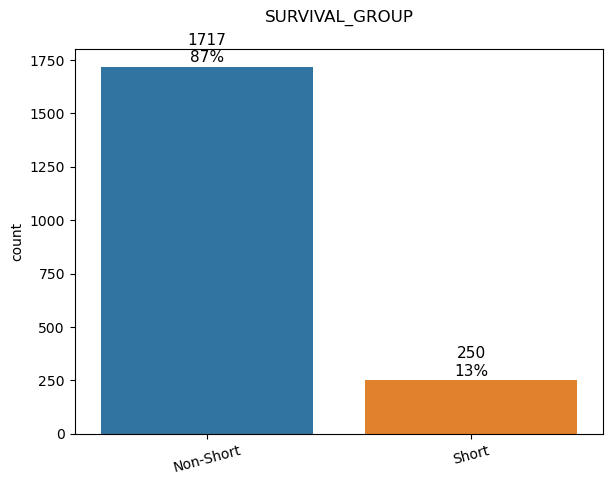

In [85]:
utils.plot_variable_distribution(
    series=y_all_decoded['Survival_Group'], 
    plot_pareto_graph=False,
    plot_percentage_lines=False,
)